# Convolutional neural networks with CIFAR-10

ACM AI Applied Track (Winter 2024)

CIFAR 10 is a very well known dataset for modern AI - it's a dataset of 60000 labeled images (50000 training and 10000 test images), with 10 categories of image (thus the 10 in the name) - airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck.  Each image is 32 by 32, and we will be using a convolutional neural network - an architecture slightly more complicated than the neural network we used for MNIST.  You'll learn more about it as we go through the notebook!

### Starting
To get started, we'll first be importing the libraries we are going to need and trying to switch over to GPU - this is just setting up our development environment

In [1]:
import torch
import numpy as np # Numpy - useful for data manipulation.
import matplotlib.pyplot as plt # Lets us display data
import torchvision # We use this for the dataset we'll use
# By importing torch we can already access these - this is just a convenience thing
import torch.nn as nn
import torch.nn.functional as F

from tqdm.notebook import tqdm # Lets us see loop progress

In [2]:
#An essential feauture of pytorch is its ability to utlize GPUs and TPUs
#This portion of the code chooses the device that while be used,
#if there is a GPU that uses the CUDA toolkit, then it will utlize it
#if not it will use the CPU for calculations
#Note many times, GPUs are much faster option, and allow for more realistic training times

if torch.cuda.is_available(): # Checks if CUDA is availiable, loads the device for computation to the GPU
    device = torch.device('cuda:0')
    print('Running on GPU')
    print(torch.cuda.get_device_name(0))
else:
    device = torch.device('cpu')
    print('Running on CPU')

Running on CPU


Data Processing

In [3]:
# download the CIFAR 10 training and testing data sets from torchvision.datasets
# There are a set of datasets that are stored on server for pytorch, anyone can donwload them if they have pytorch set up
# They are split to training and test dataset, which do not intersect!
# If you were doing this with your own dataset, you would have to make your own dataset!
train_dataset = torchvision.datasets.CIFAR10(root='./cifar10', transform=torchvision.transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./cifar10', train=False, transform=torchvision.transforms.ToTensor(), download=True)

100%|██████████| 170M/170M [00:04<00:00, 34.6MB/s] 


In [4]:
#The dataloader class makes it easy for us to handle and randomize data
#The train and test loader both have a 128 sized batches of images, and are shuffled to increase randomization(improves performance)
train_loader = torch.utils.data.DataLoader(train_dataset, 128, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, 128, shuffle=True)

(tensor([[[0.6235, 0.5882, 0.6000,  ..., 0.3569, 0.2902, 0.2980],
         [0.5569, 0.5725, 0.6078,  ..., 0.4980, 0.4784, 0.3373],
         [0.4275, 0.3882, 0.4118,  ..., 0.5373, 0.6392, 0.3647],
         ...,
         [0.9569, 0.9412, 0.9451,  ..., 0.6118, 0.7020, 0.7843],
         [0.9647, 0.9529, 0.9529,  ..., 0.6353, 0.6980, 0.7529],
         [0.9647, 0.9529, 0.9569,  ..., 0.6510, 0.6784, 0.7137]],

        [[0.4000, 0.3569, 0.3725,  ..., 0.2784, 0.2471, 0.2275],
         [0.2941, 0.2824, 0.2980,  ..., 0.4118, 0.4353, 0.2706],
         [0.2627, 0.2275, 0.2314,  ..., 0.4392, 0.5176, 0.2824],
         ...,
         [0.5059, 0.4824, 0.4784,  ..., 0.1647, 0.2314, 0.2863],
         [0.5216, 0.5020, 0.4980,  ..., 0.1725, 0.2196, 0.2549],
         [0.5451, 0.5216, 0.5176,  ..., 0.1843, 0.2000, 0.2235]],

        [[0.3961, 0.3725, 0.3804,  ..., 0.2196, 0.2157, 0.2157],
         [0.2667, 0.2588, 0.2549,  ..., 0.2784, 0.3647, 0.2392],
         [0.2941, 0.2353, 0.2039,  ..., 0.3137, 0.4118, 0

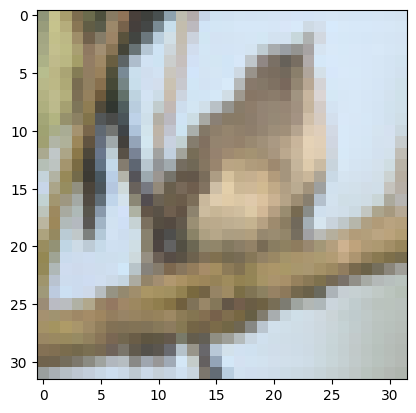

In [5]:
# visualizing a sample from train loader
print(train_dataset[5])

# Extracting an image and label from the dataset
train_iter = iter(train_loader)
batch_images, batch_labels = next(train_iter)
# The label is a number between 0 and 9 - why might that be?  Isn't the label a category, not a number?
# The image is represented as a 3 by 32 by 32 matrix (A 3-dimensional array)
image, label = batch_images[0], batch_labels[0]

print(image.shape)
plt.imshow(image.permute(1,2,0))
plt.show()

In [6]:

#This is a class module for to create a CNN, not the Module class in pytorch
#Is the base class for all models in pytorch, this contains the inner working of a module

#Functions ->
# The def __init__(self) is a constructor, where you outline the different layers and aspects of your custom class
# def forward is the function for forward propogationm you give it an input X and it outputs tensore

#Layers ->
#In pytorch a nn.Conv2d layer is a convolution 2d layer, the arguments are as follows
#nn.Conv2d(Number of Input features maps, Number of features maps, Kernel Size, Stride Size, Padding Size )
#nn.BatchNorm2d is a batch normalization layer that takes in a 2d tensor the argument is the number of input feature maps

nn.Conv2d(3, 32, kernel_size=3, padding=1, stride=2)
input_channel = 3
out_channels = 1

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        # First convolutional layer
        # Here we're defining a standard layer with Convolution, BatchNorm, and dropout
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1, stride=2)
        self.batchnorm1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU() # Using ReLU activation function
        self.dropout1 = nn.Dropout(0.1) # Adding dropout to prevent overfitting (recommend a rate of 0.1)

        # Second convolutional layer
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1, stride=2)
        self.batchnorm2 = nn.BatchNorm2d(64)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2,2)# Adding a pooling layer to reduce spatial dimensions,
        self.dropout2 = nn.Dropout(0.05) # Recommend rate of 0.05

        # Third convolutional layer
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, padding=1, stride=1)
        self.batchnorm3 = nn.BatchNorm2d(64)
        self.relu3 =nn.ReLU()
        self.dropout3 = nn.Dropout(0.05)# Recommend rate of 0.05
        self.flatten = nn.Flatten()

        # Fully connected layer - classifying the features into 10 classes
        self.fc = nn.Linear(1024, 128) #
        self.relu4 =  nn.ReLU()
        self.fc1 = nn.Linear(128, 10)

    def forward(self, x):
        # Describing the forward pass through the network
        x = self.conv1(x)
        x = self.batchnorm1(x)
        x = self.relu1(x)
        x = self.dropout1(x)

        x = self.conv2(x)
        x = self.batchnorm2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = self.dropout2(x)

        x = self.conv3(x)
        x = self.batchnorm3(x)
        x = self.relu3(x)
        x = self.dropout3(x)

        # After all those conv layers we can finally pass into a fully connected layer
        x = self.flatten(x)  # Flattening the output of the conv layers for the fully connected layer
        x = self.fc(x)
        x = self.relu4(x)
        x = self.fc1(x)
        return x  # The softmax (or another activation) can be implicitly applied by the loss function


In [7]:
# We are creating an instance of our CNN model, after which we load to model to
# the device either GPU or CPU
model = CNN()

model.to(device)

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batchnorm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (dropout1): Dropout(p=0.1, inplace=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batchnorm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout2): Dropout(p=0.05, inplace=False)
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (dropout3): Dropout(p=0.05, inplace=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Linear(in_features=1024, out_features=128, bias=True)
  (relu4): ReLU()
  (fc1): Linear(in_features=128, out_features=10, bias=True)
)

In [8]:
#This is where we define our loss, in this case the loss is cross entorpy
criterion = nn.CrossEntropyLoss()

In [9]:
#We define the optimizer here, the model.paramters() ar all the paramters of our model, lr is the learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

## Training


In [10]:
#This is the training loop, it will take the model, train loader, the optimizer and device
#It loops through each training data and trains the model
#Note the data is loaded in batches not single instances, this is important
def train_one_epoch(model, train_loader, optimizer, criterion, device):
    model.train()
    for i, batch in tqdm(enumerate(train_loader)):  # looping through
        inputs, labels = batch # The batch contains the inputs and labels
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('End of epoch loss:', round(loss.item(), 3))

## Testing


In [11]:

#This is the same as above except that there is no optimization just testing for accruacy
@torch.no_grad() # Letting torch know we don't need the gradients as we are only testing
def test(model, test_loader, device):
    # we've manually specified the classes - these are from the cifar-10 dataset
    classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

    # Put the model in evaluation mode
    model.eval()
    correct = 0
    for i, batch in tqdm(enumerate(test_loader)):
         inputs, labels = batch
         inputs = inputs.to(device)
         labels = labels.to(device)
         outputs= model(inputs)
         predictions = torch.argmax(outputs, dim=1)
         correct += (predictions == labels).sum().item()

    print(f"End of epoch accuracy: {100 * correct / len(test_dataset)}%")

    # visualizing the current model's performance
    for i in range(min(len(inputs), 8)):
        print('Guess:', classes[predictions[i]], '| Label:', classes[labels[i]])
        plt.imshow(inputs[i].cpu().permute(1,2,0))
        plt.show()

# Running the train-test loop

Epoch:  1


0it [00:00, ?it/s]

End of epoch loss: 1.201


0it [00:00, ?it/s]

End of epoch accuracy: 56.97%
Guess: deer | Label: deer


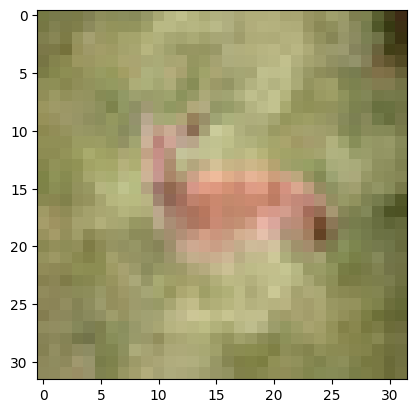

Guess: ship | Label: horse


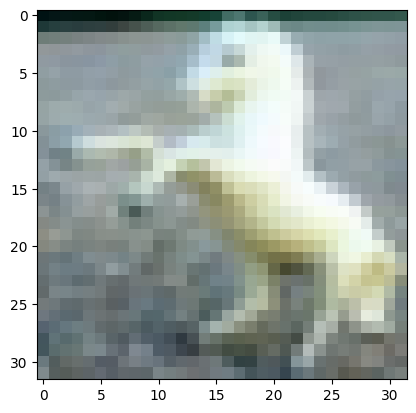

Guess: bird | Label: cat


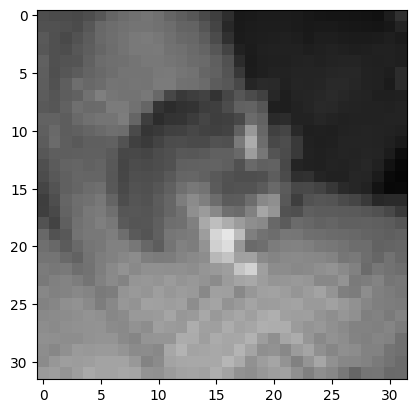

Guess: bird | Label: plane


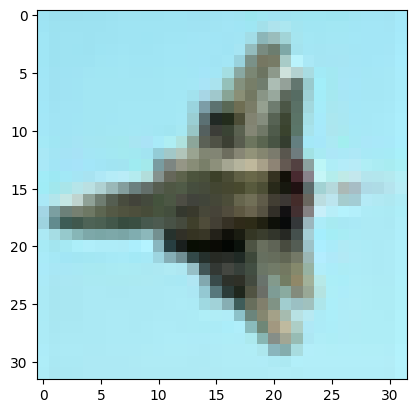

Guess: ship | Label: car


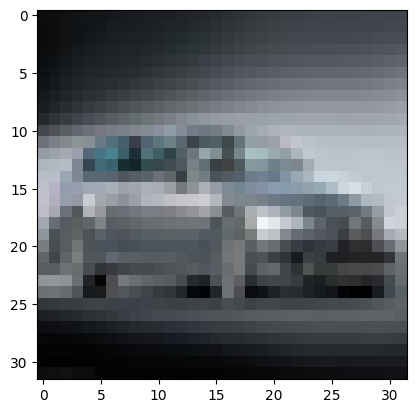

Guess: frog | Label: cat


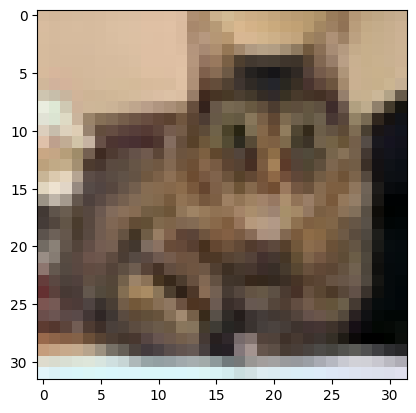

Guess: truck | Label: truck


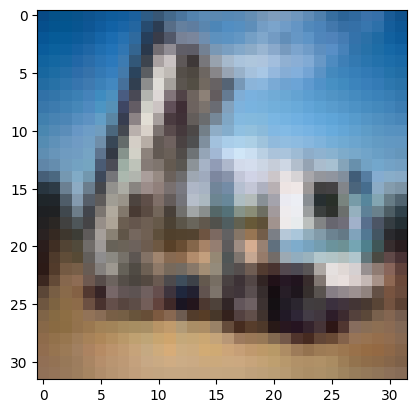

Guess: bird | Label: bird


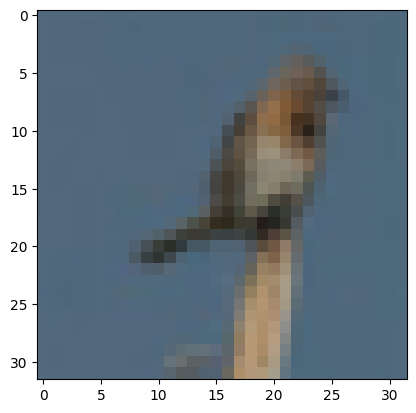

Epoch:  2


0it [00:00, ?it/s]

End of epoch loss: 0.79


0it [00:00, ?it/s]

End of epoch accuracy: 57.89%
Guess: horse | Label: deer


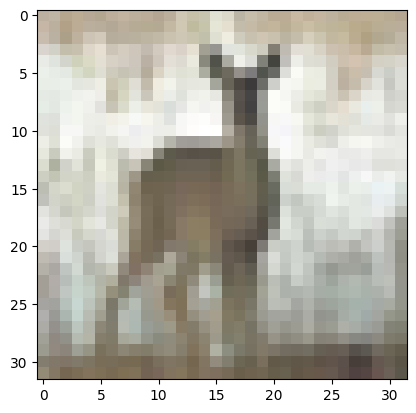

Guess: frog | Label: bird


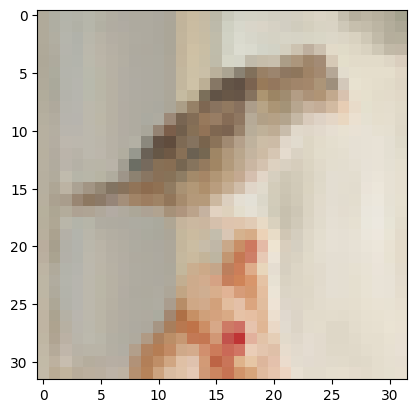

Guess: plane | Label: plane


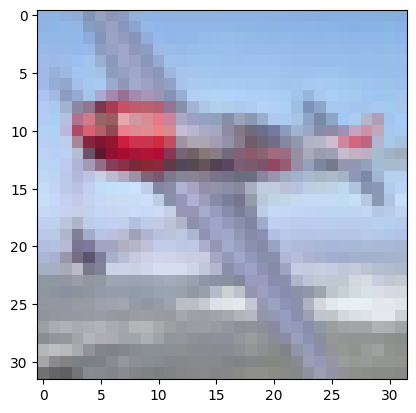

Guess: car | Label: car


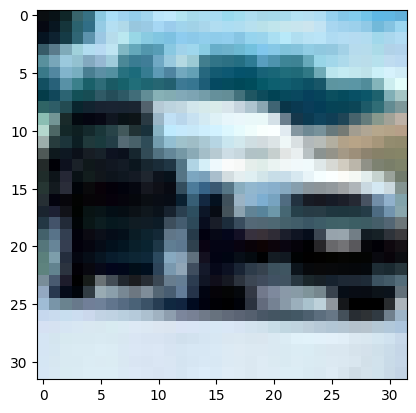

Guess: truck | Label: bird


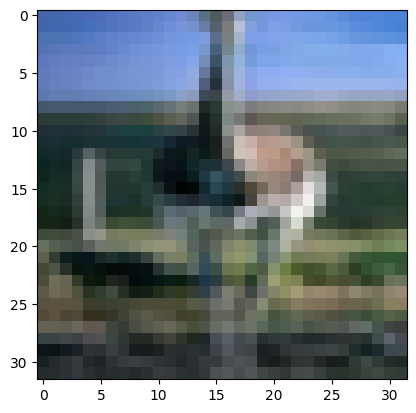

Guess: horse | Label: horse


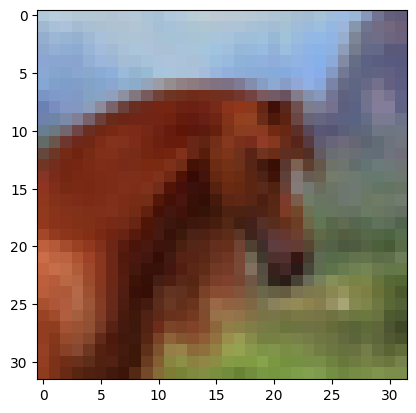

Guess: dog | Label: dog


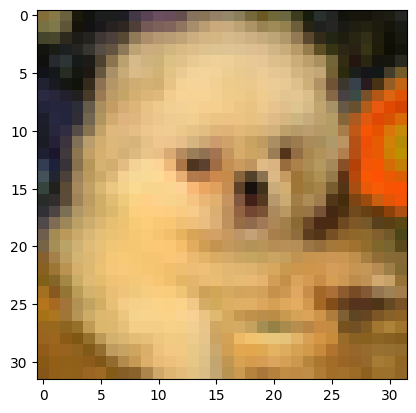

Guess: truck | Label: truck


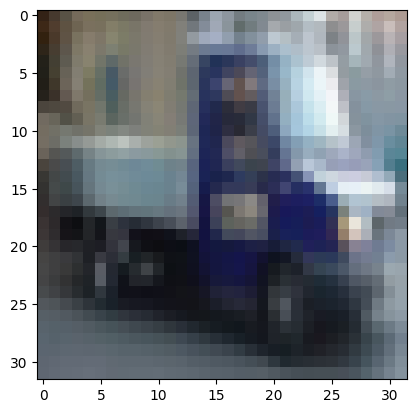

In [12]:
#This is where the training and testing loop is called
NUM_EPOCHS = 2 # One epoch is one loop through the training data

for epoch in range(NUM_EPOCHS):
    print("Epoch: ", epoch + 1)
    train_one_epoch(model, train_loader, optimizer, criterion, device)
    test(model, test_loader, device)

In [13]:
size = 0
for param in model.parameters():
    size += np.prod(param.shape)
print(f"Number of parameters: {size}")

Number of parameters: 189130


In [14]:
torch.save(model.state_dict(), "model.pth")

In [15]:
# reload the weights you just saved

model_new = CNN()
model_new.load_state_dict(torch.load("model.pth"))
model_new.to(device)
model_new.eval()

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batchnorm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (dropout1): Dropout(p=0.1, inplace=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batchnorm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout2): Dropout(p=0.05, inplace=False)
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (dropout3): Dropout(p=0.05, inplace=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Linear(in_features=1024, out_features=128, bias=True)
  (relu4): ReLU()
  (fc1): Linear(in_features=128, out_features=10, bias=True)
)

0it [00:00, ?it/s]

End of epoch accuracy: 57.89%
Guess: dog | Label: dog


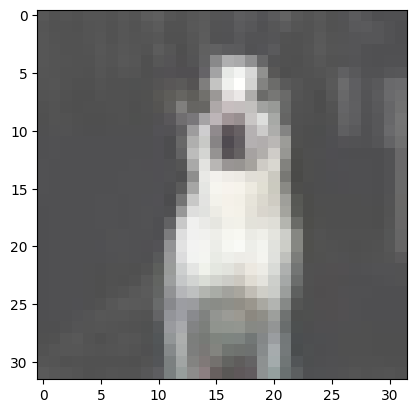

Guess: frog | Label: cat


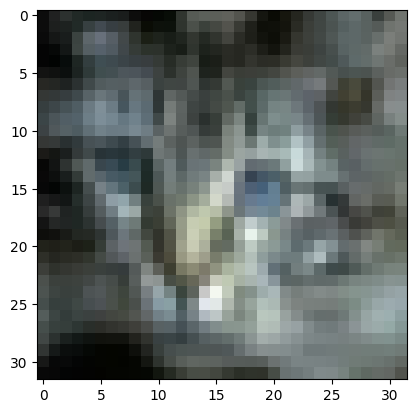

Guess: deer | Label: cat


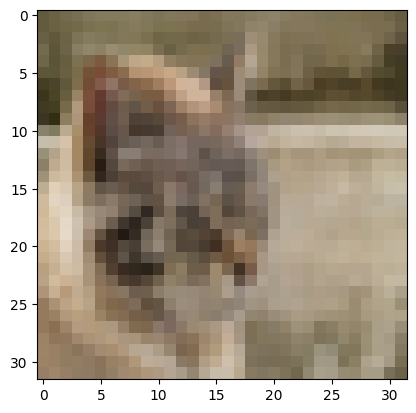

Guess: frog | Label: horse


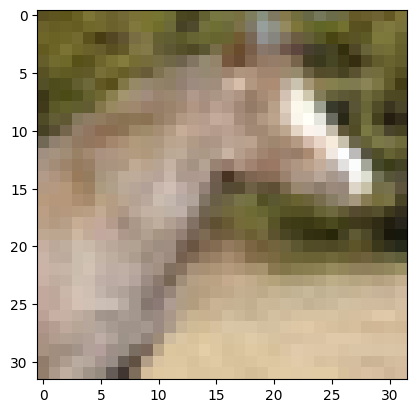

Guess: frog | Label: bird


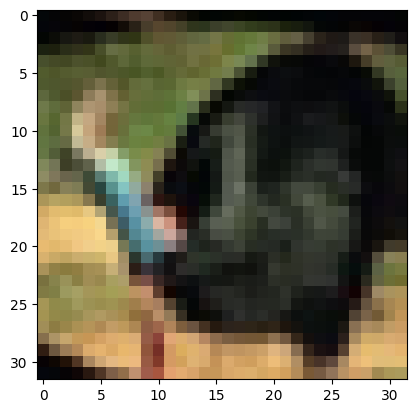

Guess: frog | Label: frog


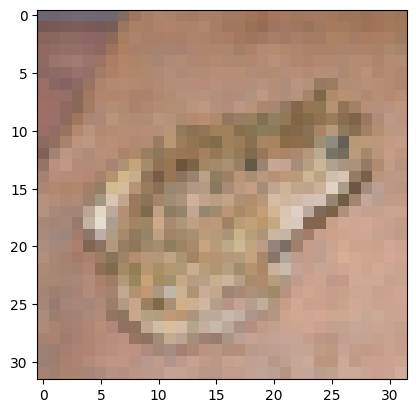

Guess: horse | Label: cat


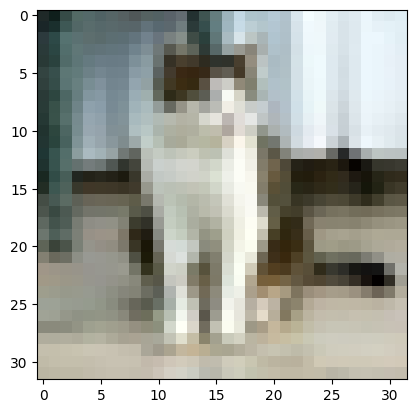

Guess: cat | Label: cat


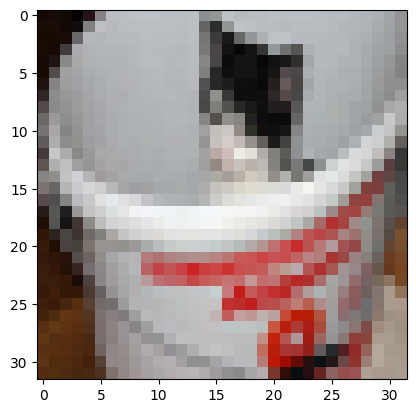

In [16]:
test(model_new, test_loader, device)